In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18, 'font.weight': "bold"})

from joblib import load
import uncertainty_toolbox as uct

from actlearn.select import predict_posterior

In [3]:
df = pd.read_csv("../data/experimental_results_final.csv", low_memory=False)

In [4]:
df

,Unnamed: 0,inchikey_short,smiles,smiles_alkyl,smiles_aryl,rsmi,CAD Yield (%),selection,category,inchikey,...,f_Br_tm_water_nucleophilic_paboon,f_Br_tm_water_nucleophilic_fasm,f_Br_tm_water_electrophilic_mulliken,f_Br_tm_water_electrophilic_loewdin,f_Br_tm_water_electrophilic_paboon,f_Br_tm_water_electrophilic_fasm,f_Br_tm_water_radical_mulliken,f_Br_tm_water_radical_loewdin,f_Br_tm_water_radical_paboon,f_Br_tm_water_radical_fasm
0,240,XNTZQQJYBAVVBN,CC(C)(C)OC(=O)N1CCC(COc2ccc(CCOCCOCCOCCOCCOCCO...,OCCOCCOCCOCCOCCOCCOCCBr,CC(C)(C)OC(=O)N1CCC(COc2ccc(Br)cc2)CC1,OCCOCCOCCOCCOCCOCCOCCBr.CC(C)(C)OC(=O)N1CCC(CO...,26.433863,active_learning_3,NaN,XNTZQQJYBAVVBN-UHFFFAOYNA-N,...,0.3142,0.4012,0.0550,0.0457,0.0470,0.0625,0.2240,0.2112,0.1806,0.2319
1,242,VGALJOYHHPJTRF,CCOC(=O)C(=O)CC(=O)c1ccc(CCOCCOCCOCCOCCOCCOCCO...,OCCOCCOCCOCCOCCOCCOCCBr,CCOC(=O)C(=O)CC(=O)c1ccc(Br)cc1,OCCOCCOCCOCCOCCOCCOCCBr.CCOC(=O)C(=O)CC(=O)c1c...,125.940938,active_learning_3,NaN,VGALJOYHHPJTRF-UHFFFAOYNA-N,...,0.3142,0.4012,0.0550,0.0457,0.0470,0.0625,0.2240,0.2112,0.1806,0.2319
2,243,YNCKNPJTIKQSIA,O=S(=O)(c1ccc(CCOCCOCCOCCOCCOCCOCCO)cc1)N1CCSCC1,OCCOCCOCCOCCOCCOCCOCCBr,O=S(=O)(c1ccc(Br)cc1)N1CCSCC1,OCCOCCOCCOCCOCCOCCOCCBr.O=S(=O)(c1ccc(Br)cc1)N...,29.159488,active_learning_3,NaN,YNCKNPJTIKQSIA-UHFFFAOYNA-N,...,0.3142,0.4012,0.0550,0.0457,0.0470,0.0625,0.2240,0.2112,0.1806,0.2319
3,244,DYQLOQDUQBLOSM,CS(=O)(=O)N(c1ccc(CCOCCOCCOCCOCCOCCOCCO)cc1)S(...,OCCOCCOCCOCCOCCOCCOCCBr,CS(=O)(=O)N(c1ccc(Br)cc1)S(C)(=O)=O,OCCOCCOCCOCCOCCOCCOCCBr.CS(=O)(=O)N(c1ccc(Br)c...,32.030599,active_learning_3,NaN,DYQLOQDUQBLOSM-UHFFFAOYNA-N,...,0.3142,0.4012,0.0550,0.0457,0.0470,0.0625,0.2240,0.2112,0.1806,0.2319
4,245,TWWYELOXTBLFOU,Cc1cccc(-c2c(F)cccc2CCOCCOCCOCCOCCOCCOCCO)c1,OCCOCCOCCOCCOCCOCCOCCBr,Cc1cccc(-c2c(F)cccc2Br)c1,OCCOCCOCCOCCOCCOCCOCCBr.Cc1cccc(-c2c(F)cccc2Br...,26.285575,active_learning_3,NaN,TWWYELOXTBLFOU-UHFFFAOYNA-N,...,0.3142,0.4012,0.0550,0.0457,0.0470,0.0625,0.2240,0.2112,0.1806,0.2319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,33053,IUJBRMDXCCOTJW,C#CCCCCCc1cccc(C(=O)OC)c1C,C#CCCCCCBr,COC(=O)c1cccc(Br)c1C,C#CCCCCCBr.COC(=O)c1cccc(Br)c1C>>C#CCCCCCc1ccc...,3.333459,cores2_active_learning_1,NaN,IUJBRMDXCCOTJW-UHFFFAOYNA-N,...,0.3052,0.3997,0.3354,0.3399,0.3484,0.3085,0.3626,0.3582,0.3268,0.3541
1070,33100,PVFAUZCHDLESLD,COC(=O)c1cccc(CCP(=O)(O)O)c1C,O=P(O)(O)CCBr,COC(=O)c1cccc(Br)c1C,O=P(O)(O)CCBr.COC(=O)c1cccc(Br)c1C>>COC(=O)c1c...,51.907609,cores2_active_learning_2,NaN,PVFAUZCHDLESLD-KGCNKATMNA-N,...,0.3339,0.4198,0.4119,0.4113,0.4186,0.3773,0.4201,0.4061,0.3762,0.3986
1071,33192,WYXILCHAZIMCPY,COC(=O)c1cccc(C2CC(F)(F)C2)c1C,FC1(F)CC(Br)C1,COC(=O)c1cccc(Br)c1C,FC1(F)CC(Br)C1.COC(=O)c1cccc(Br)c1C>>COC(=O)c1...,0.000000,cores2_active_learning_1,NaN,WYXILCHAZIMCPY-UHFFFAOYNA-N,...,0.3402,0.4295,0.5569,0.5482,0.5672,0.4998,0.4963,0.4737,0.4537,0.4647
1072,33248,CNDNZIDAFOFXJL,COC(=O)c1cccc(C[C@@H](O)CCl)c1C,OC(CCl)CBr,COC(=O)c1cccc(Br)c1C,O[C@@H](CCl)CBr.COC(=O)c1cccc(Br)c1C>>COC(=O)c...,8.065955,cores2_test_2,NaN,CNDNZIDAFOFXJL-SNVBAGLBNA-N,...,0.3276,0.4197,0.3783,0.3718,0.3825,0.3519,0.3930,0.3839,0.3550,0.3858


In [6]:
df["selection"].value_counts()

selection
active_learning_2           96
random_1                    95
random_3                    93
test_2                      91
random_4                    90
active_learning_3           86
random_2                    84
initial_diverse             83
active_learning_1           76
test_1                      70
cores2_test_1               45
cores2_active_learning_1    45
cores2_active_learning_2    44
cores2_test_2               44
test_3                      32
Name: count, dtype: int64

In [7]:
test = df[df["selection"].isin(["test_1", "test_2", "test_3"])].copy()

In [8]:
f_cols = [col for col in df.columns if col.startswith("f_")]

In [9]:
targets = test["CAD Yield (%)"].values

In [10]:
model0 = load("../models/model_batch1_pick0.pkl") # trained only on initial diverse data
model1 = load("../models/model_batch2_pick0.pkl") # initial + batch 1
model2 = load("../models/model_batch3_pick0.pkl") # initial + batch 1-2
model3 = load("../models/model_batch4_pick0.pkl") # initial + batch 1-3

/da/CADD/soyluci1/projects/mcds/mcds-actlearn/env/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/da/CADD/soyluci1/projects/mcds/mcds-actlearn/env/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
preds_0, std_0 = predict_posterior(model=model0, X=test[f_cols].values)
preds_1, std_1 = predict_posterior(model=model1, X=test[f_cols].values)
preds_2, std_2 = predict_posterior(model=model2, X=test[f_cols].values)
preds_3, std_3 = predict_posterior(model=model3, X=test[f_cols].values)

Text(0.5, 1.0, 'Model after batch 0')

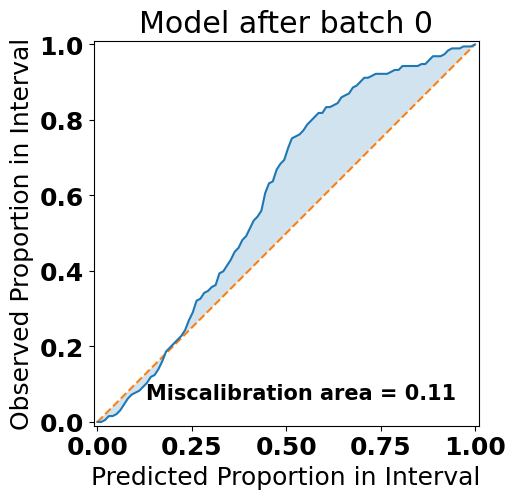

In [12]:
uct.viz.plot_calibration(preds_0, std_0, targets)
plt.title("Model after batch 0")

Text(0.5, 1.0, 'Model after batch 1')

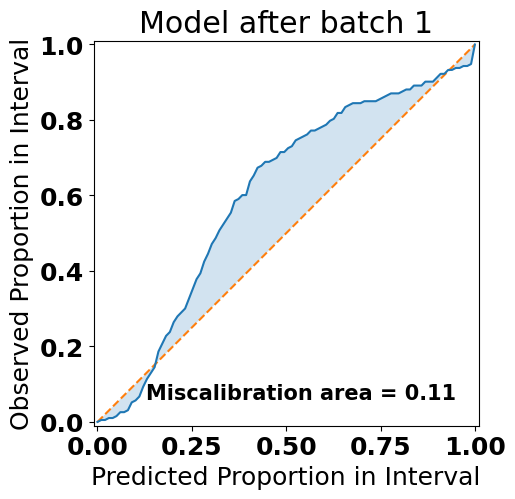

In [13]:
uct.viz.plot_calibration(preds_1, std_1, targets)
plt.title("Model after batch 1")

Text(0.5, 1.0, 'Model after batch 2')

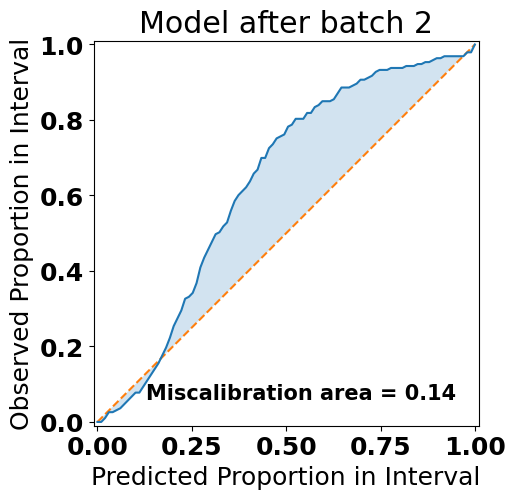

In [14]:
uct.viz.plot_calibration(preds_2, std_2, targets)
plt.title("Model after batch 2")

Text(0.5, 1.0, 'Model after batch 3')

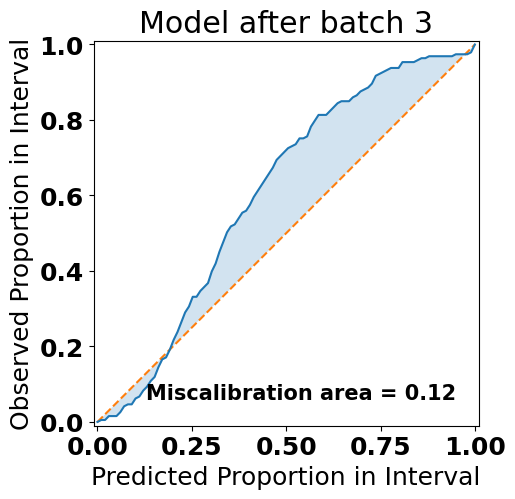

In [15]:
uct.viz.plot_calibration(preds_3, std_3, targets)
plt.title("Model after batch 3")

In [16]:
pnn_metrics = uct.metrics.get_all_metrics(preds_0, std_0, targets)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.45it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.68it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           12.386
  RMSE          17.586
  MDAE          9.117
  MARPD         142.767
  R2            -0.091
  Correlation   0.396
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.131
  Mean-absolute Calibration Error       0.104
  Miscalibration Area                   0.106
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.167
     Group Size: 0.56 -- Calibration Error: 0.120
     Group Size: 1.00 -- Calibration Error: 0.104
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.211
     Group Size: 0.56 -- Calibration Error: 0.153
     Group Size: 1.00 -- Calibration Error: 0.131
===========

In [17]:
pnn_metrics = uct.metrics.get_all_metrics(preds_1, std_1, targets)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.39it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.69it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           11.197
  RMSE          18.463
  MDAE          4.211
  MARPD         151.585
  R2            -0.202
  Correlation   0.336
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.139
  Mean-absolute Calibration Error       0.113
  Miscalibration Area                   0.114
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.184
     Group Size: 0.56 -- Calibration Error: 0.144
     Group Size: 1.00 -- Calibration Error: 0.113
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.234
     Group Size: 0.56 -- Calibration Error: 0.172
     Group Size: 1.00 -- Calibration Error: 0.139
===========

In [18]:
pnn_metrics = uct.metrics.get_all_metrics(preds_2, std_2, targets)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.49it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.68it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           8.405
  RMSE          13.036
  MDAE          3.449
  MARPD         143.277
  R2            0.401
  Correlation   0.661
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.168
  Mean-absolute Calibration Error       0.138
  Miscalibration Area                   0.139
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.210
     Group Size: 0.56 -- Calibration Error: 0.156
     Group Size: 1.00 -- Calibration Error: 0.138
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.239
     Group Size: 0.56 -- Calibration Error: 0.194
     Group Size: 1.00 -- Calibration Error: 0.168
=============

In [19]:
pnn_metrics = uct.metrics.get_all_metrics(preds_3, std_3, targets)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.81it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:01<00:00,  7.69it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           8.581
  RMSE          13.665
  MDAE          3.185
  MARPD         143.429
  R2            0.342
  Correlation   0.633
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.139
  Mean-absolute Calibration Error       0.116
  Miscalibration Area                   0.117
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.172
     Group Size: 0.56 -- Calibration Error: 0.135
     Group Size: 1.00 -- Calibration Error: 0.116
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.215
     Group Size: 0.56 -- Calibration Error: 0.160
     Group Size: 1.00 -- Calibration Error: 0.139
=============

Text(0.5, 1.0, 'Model after batch 0')

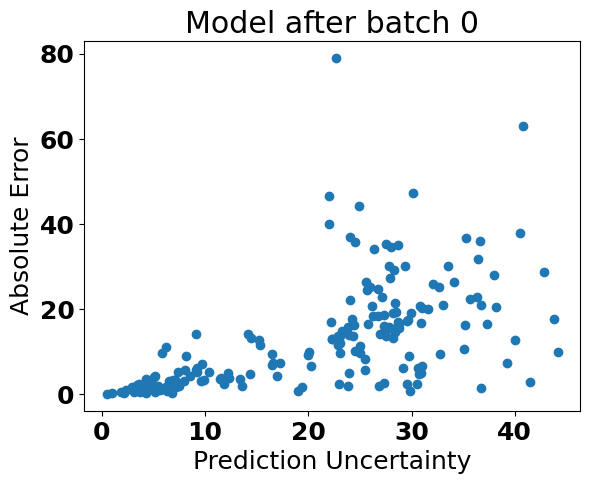

In [26]:
plt.scatter(std_0, np.abs(targets - preds_0))
plt.xlabel("Prediction Uncertainty")
plt.ylabel("Absolute Error")
plt.title("Model after batch 0")


Text(0.5, 1.0, 'Model after batch 1')

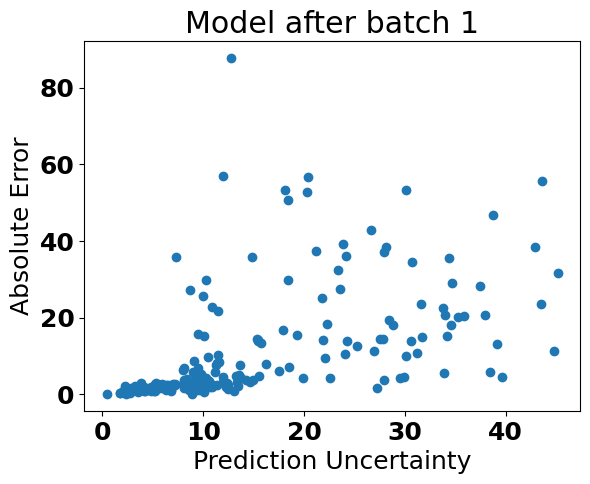

In [27]:
plt.scatter(std_1, np.abs(targets - preds_1))
plt.xlabel("Prediction Uncertainty")
plt.ylabel("Absolute Error")
plt.title("Model after batch 1")

Text(0.5, 1.0, 'Model after batch 2')

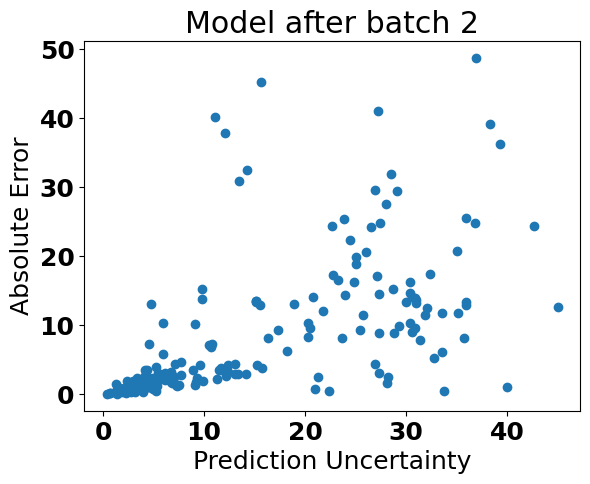

In [28]:
plt.scatter(std_2, np.abs(targets - preds_2))
plt.xlabel("Prediction Uncertainty")
plt.ylabel("Absolute Error")
plt.title("Model after batch 2")

Text(0.5, 1.0, 'Model after batch 3')

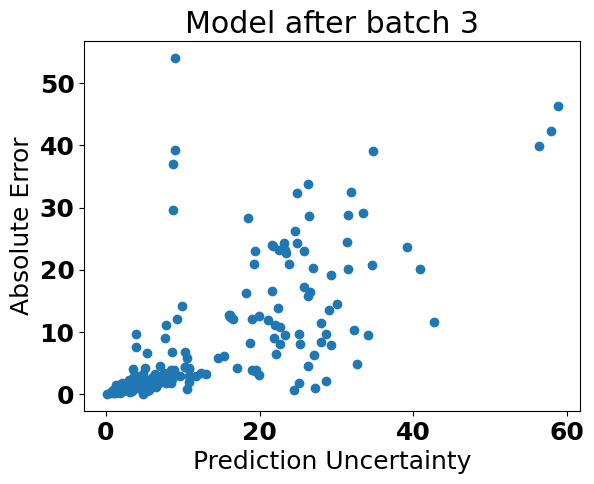

In [29]:
plt.scatter(std_3, np.abs(targets - preds_3))
plt.xlabel("Prediction Uncertainty")
plt.ylabel("Absolute Error")
plt.title("Model after batch 3")